In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import os

%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs

In [5]:
data = make_blobs(n_samples=300,
                  n_features=2,
                  centers = 2,
                  cluster_std=1.0, random_state=101)

In [7]:
X,y = data

In [8]:
X

array([[ -8.87772115,  -6.76007802],
       [  0.630638  ,   3.10707466],
       [ -0.24060881,   2.82068999],
       [ -7.83909113,  -8.20754485],
       [-10.9729082 ,  -7.39067645],
       [-10.81648852,  -5.82372891],
       [  0.96977807,   0.50825184],
       [-10.29728144,  -7.21832357],
       [  0.04271579,   3.50389089],
       [  0.15391601,   2.19349145],
       [ -9.81008003,  -5.35480445],
       [-11.18334003,  -6.7004804 ],
       [  0.51876688,   3.39210906],
       [ -8.09111654,  -6.92631627],
       [  1.1112886 ,   0.704398  ],
       [ -7.49469451,  -7.06186612],
       [ -0.75249891,   2.31574949],
       [  0.72046137,   1.63484242],
       [ -0.80867204,   1.41371822],
       [  1.13010192,  -0.25418504],
       [-10.6252148 ,  -6.71479817],
       [ -0.06311641,   3.15682868],
       [  0.56609951,   3.41000402],
       [ -9.10474956,  -7.83047821],
       [-11.33926304,  -7.83622233],
       [  0.29639341,   2.06317757],
       [ -0.52722349,   2.95534215],
 

In [9]:
y

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0])

In [11]:
# add a third feature which is noise

np.random.seed(seed=101)
z_noise = np.random.normal(size=len(X))
z_noise = pd.Series(z_noise)

In [12]:
feat = pd.DataFrame(X)
feat = pd.concat([feat,z_noise],axis=1)
feat.columns = ['X1','X2','X3']
feat.head()

,X1,X2,X3
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118


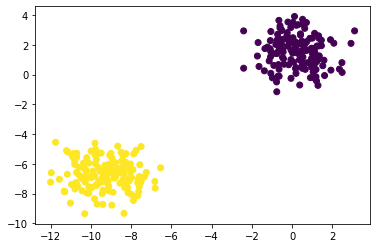

In [15]:
plt.scatter(feat['X1'], feat['X2'], c=y)

In [20]:
from mpl_toolkits.mplot3d import Axes3D

In [21]:
%matplotlib notebook

<IPython.core.display.Javascript object>


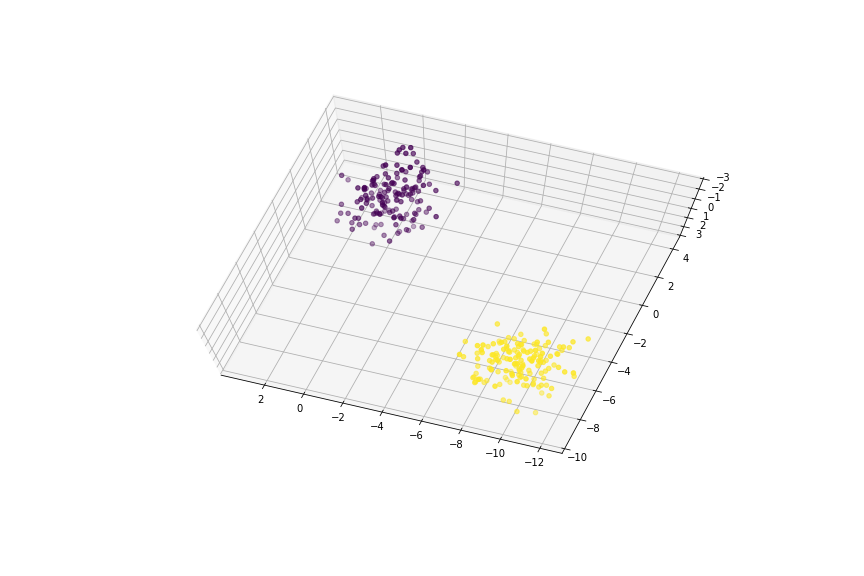

In [22]:
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feat['X1'], feat['X2'], feat['X3'], c=y)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# stochastic gradient descent
from tensorflow.keras.optimizers import SGD

In [25]:
# go from 3 ----> 2 ----> 2

encoder = Sequential()
encoder.add(Dense(units=2, activation='relu', input_shape=[3]))

In [26]:
decoder = Sequential()
decoder.add(Dense(units = 3, activation='relu', input_shape=[2]))

In [27]:
autoencoder = Sequential([encoder, decoder])

In [28]:
autoencoder.compile(loss='mse', optimizer=SGD(lr=1.5))

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(feat)

In [32]:
autoencoder.fit(scaled_data, scaled_data, epochs=5)

Train on 300 samples
Epoch 1/5
300/300 [==============================] - 1s 2ms/sample - loss: 0.2782
Epoch 2/5
300/300 [==============================] - 0s 51us/sample - loss: 0.1735
Epoch 3/5
300/300 [==============================] - 0s 56us/sample - loss: 0.0659
Epoch 4/5
300/300 [==============================] - 0s 57us/sample - loss: 0.0619
Epoch 5/5
300/300 [==============================] - 0s 56us/sample - loss: 0.0508


In [33]:
encoded_2dim = encoder.predict(scaled_data)

In [34]:
encoded_2dim

array([[0.46041012, 0.        ],
       [1.3010745 , 0.        ],
       [1.2592607 , 0.        ],
       [0.22309035, 0.        ],
       [0.04846424, 0.        ],
       [0.01135868, 0.        ],
       [1.0507169 , 0.        ],
       [0.09864098, 0.        ],
       [0.97070545, 0.        ],
       [1.2429073 , 0.        ],
       [0.1999178 , 0.        ],
       [0.        , 0.        ],
       [1.2540414 , 0.        ],
       [0.1115799 , 0.        ],
       [1.0589843 , 0.        ],
       [0.3459046 , 0.        ],
       [1.1197371 , 0.        ],
       [1.4033608 , 0.        ],
       [1.3569834 , 0.        ],
       [1.2075188 , 0.        ],
       [0.06060117, 0.        ],
       [1.3758936 , 0.        ],
       [1.0402985 , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [1.2076592 , 0.        ],
       [1.1589551 , 0.        ],
       [1.1588936 , 0.        ],
       [0.16978341, 0.        ],
       [0.00408733, 0.        ],
       [0.

In [35]:
encoded_2dim.shape

(300, 2)

<IPython.core.display.Javascript object>


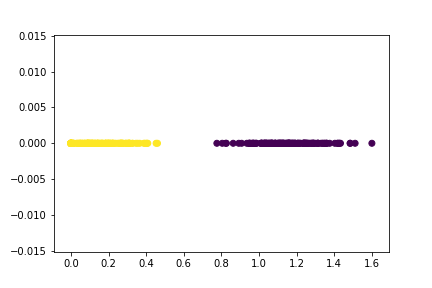

In [38]:
plt.scatter(encoded_2dim[:,0],encoded_2dim[:,1], c=y)